<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-2">Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Visualise-the-data" data-toc-modified-id="Visualise-the-data-2.1">Visualise the data</a></span></li></ul></li><li><span><a href="#Supervised-learning" data-toc-modified-id="Supervised-learning-3">Supervised learning</a></span></li></ul></div>

# Introduction
I will explore the diabetes dataset from scikit-learn and see if we can apply any machine learning algorithms on the dataset. My aim is to be exposed to a range of different datasets from different sources and evaluate the merit in applying machine learning to these datasets.

In [35]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.style.use('ggplot')

# Exploratory Data Analysis
We will look at the data initially to examine it and look at the input features, and the target variable.
Following this we should be in a better position to carry out some Machine Learning algorithm on the data, and evaluate its merit after doing so.

In [11]:
diabetes_data = datasets.load_diabetes()

diabetes_data.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [10]:
print(diabetes_data['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

We have already been told that the features have been scaled (normalised and standardised), therefore there is no need to feature scale this data. 

In [19]:
features_df = pd.DataFrame(
    data=diabetes_data['data'],
    columns=diabetes_data['feature_names'])
target = diabetes_data['target']

In [20]:
diabetes_features_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


## Visualise the data
Before undertaking an machine learning project, it helps to visualise the target values, to get an intuition for the type of data we are looking at.

Text(0.5, 0, 'Observation Number')

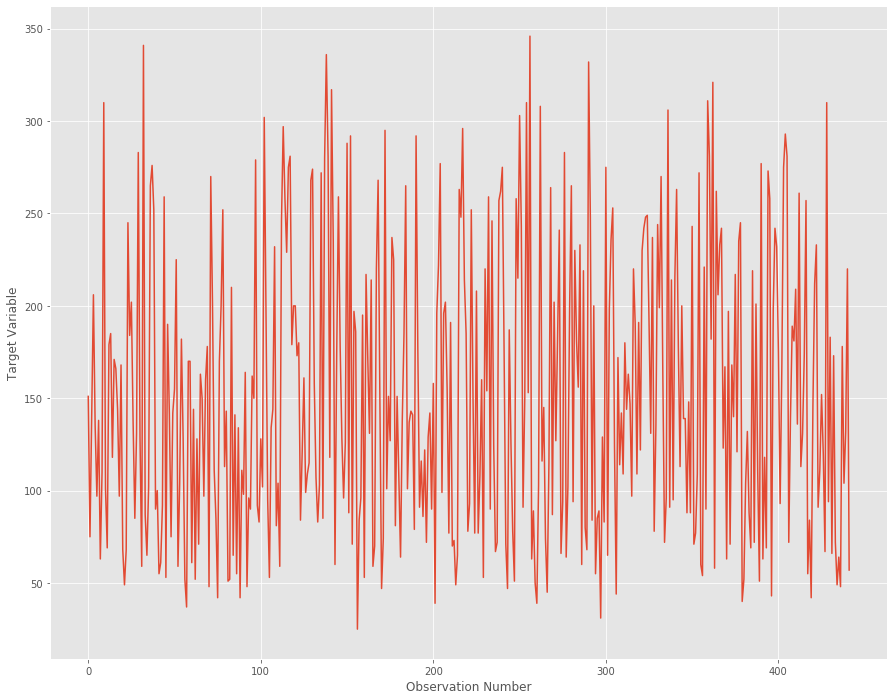

In [24]:
plt.figure(figsize=(15,12))
plt.plot(target)
plt.ylabel("Target Variable")
plt.xlabel("Observation Number")

This line plot above isn't too intuitive about the nature of the data. It might be more helpful to plot a histogram to get an idea of the distribution of the data.

(array([38., 80., 68., 62., 50., 41., 38., 42., 17.,  6.]),
 array([ 25. ,  57.1,  89.2, 121.3, 153.4, 185.5, 217.6, 249.7, 281.8,
        313.9, 346. ]),
 <a list of 10 Patch objects>)

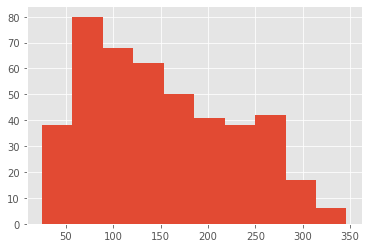

In [25]:
plt.hist(target)

# Supervised learning
Since we have both the input data and the response variables, my first port of call would be to look at supervised learning, and see if we can fit a model to the data, to best predict whether or not the model works.

In order to train a model we must split the dataset into a training set to train the model on, and a test set (on which we can verify the accuracy of the model). 
Therefore, as a rule we will use 80% of the data for training, and the other 20% for testing.

We will use the *train_test_split* method of *scikit-learn*, which ensures that the data is split randomly, to remove any bias that might exist in the ordering, and the split the sample into the training and testing set.

In [41]:
X, y = diabetes_data['data'], diabetes_data['target']
# a, b = datasets.load_diabetes(return_X_y=True)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=10) # the random state will ensure we sample the same ones each time the notebook is run

In [47]:
X_train.shape

(309, 10)

So, we can see that we have 309 of the original observations in our training set, and complementing this will be the 309 response variables for those original observations.

In [48]:
# create the linear regression model
reg = linear_model.LinearRegression()

# train the model on the training sets used before
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We can look at what the coefficients in our linear regression model are:

In [63]:
reg.coef_

array([  16.43761831, -223.55014379,  538.8442475 ,  274.22260478,
       -917.24014562,  378.94084512,  262.65687528,  451.75981325,
        711.38235372,  109.26789802])

So, the model looks roughly like:
\begin{equation}
    response = 16.4 - 224 \cdot age + 539 \cdot sex + 274* {body mass index} + ...
\end{equation}

Now we have trained the model using the test set, we want to test how good the model is at predicting the response variable, and we will do this using the test set.